In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [32]:
# View all of the classes that automap found
columns = Base.classes.keys()
columns

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [58]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23',)

In [76]:
# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,23) - dt.timedelta(days=365)
previous_year

datetime.date(2016, 8, 23)

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > previous_year).all()

In [75]:
# Perform a query to retrieve the date and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data_df = pd.DataFrame(precip_data, columns=['date','prcp']).set_index('date')

In [78]:
# Sort the dataframe by date
precip_data_df.sort_values(by=["date"])

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


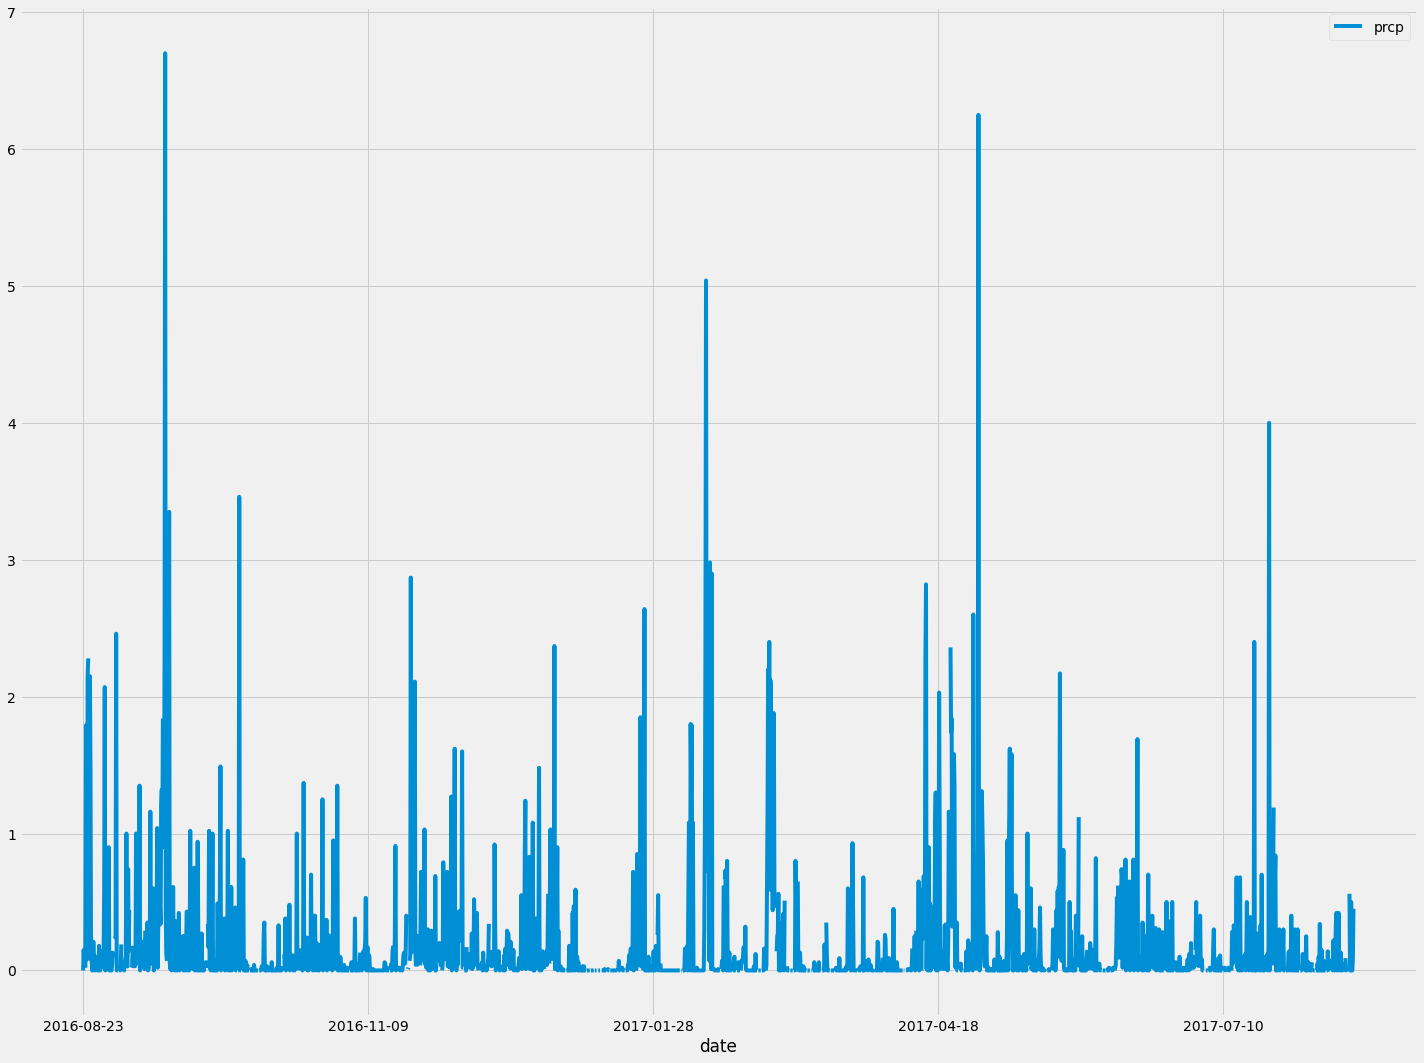

In [82]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_data_df.plot(figsize=(20,15))
plt.tight_layout()
plt.show()

In [83]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_data_df[["prcp"]].describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [89]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [106]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_data = session.query(Measurement.station,Measurement.date, Measurement.prcp, Measurement.tobs)
station_data_df = pd.DataFrame(station_data, columns=['station','date','prcp','tobs'])
station_data_df.groupby(['station'])['prcp'].count()

station
USC00511918    1932
USC00513117    2696
USC00514830    1937
USC00516128    2484
USC00517948     683
USC00518838     342
USC00519281    2772
USC00519397    2685
USC00519523    2572
Name: prcp, dtype: int64

In [107]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = station_data_df.loc[(station_data_df['station']=='USC00519281')]

In [111]:
lowest_temp = most_active['tobs'].min()
lowest_temp

54.0

In [112]:
highest_temp = most_active['tobs'].max()
highest_temp

85.0

In [113]:
average_temp = most_active['tobs'].mean()
average_temp

71.66378066378067

In [115]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active['date'].max()
active_12_months = most_active.loc[(most_active['date']<='2017-08-18') & (most_active['date']>='2016-08-18')]

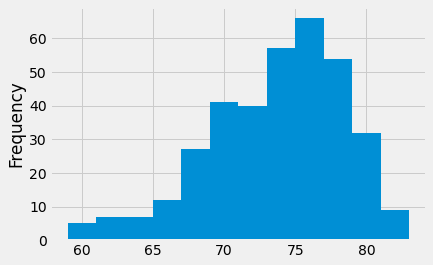

In [121]:
active_12_months["tobs"].plot(kind = 'hist', bins=12)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()